In [1]:
import psycopg2
import pandas as pd
import sh
from IPython.display import display, HTML, Javascript
from shapely import wkt
from geopandas import GeoDataFrame as gdf


parcels = psycopg2.connect('service=parcels')

In [2]:
cur = parcels.cursor()
cur.execute("DROP MATERIALIZED VIEW IF EXISTS parcel_risk_temp")
parcels.commit()
cur.execute("create materialized view parcel_risk_temp AS select p.*, r.risk_category as parcel_risk_category from parcels p LEFT JOIN parcel_risk_category r ON p.parcel_id = r.parcel_id WHERE p.cnty_code='001' and p.state='ID';")
parcels.commit()

In [3]:
df1 = gdf.from_postgis("""SELECT * FROM parcel_risk_temp;""", con=parcels, geom_col='wkb_geometry')
cur.execute("DROP MATERIALIZED VIEW IF EXISTS parcel_risk_temp")
parcels.commit()
df1

,ogc_fid,wkb_geometry,parcel_id,state_code,cnty_code,apn,apn2,addr,city,state,...,condition,constr_typ,ext_walls,quality,story_nbr,bld_units,units_nbr,risk_category,risk_data,parcel_risk_category
0,1562,"MULTIPOLYGON (((-116.39411 43.64676, -116.3941...",819392162.0,16,001,R0364330130,None,4618 N ALESTER AVE,MERIDIAN,ID,...,None,None,None,None,NaN,NaN,NaN,None,None,None
1,203,"MULTIPOLYGON (((-116.17984 43.58316, -116.1799...",819389179.0,16,001,R1079990110,None,305 E SYDMOR DR,BOISE,ID,...,None,None,None,None,NaN,NaN,NaN,None,None,Medium
2,258,"MULTIPOLYGON (((-116.35947 43.65646, -116.3594...",819389501.0,16,001,R1083870080,None,N MCCARTHY AVE,BOISE,ID,...,None,None,None,None,NaN,NaN,NaN,None,None,Medium
3,338,"MULTIPOLYGON (((-116.35651 43.63153, -116.3565...",819390802.0,16,001,R0945600070,None,2955 N CAJUN LN,MERIDIAN,ID,...,None,None,None,None,NaN,NaN,NaN,None,None,None
4,339,"MULTIPOLYGON (((-116.35619 43.63095, -116.3561...",819390803.0,16,001,R0945600130,None,2875 N CAJUN LN,MERIDIAN,ID,...,None,None,None,None,NaN,NaN,NaN,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171317,125008,"MULTIPOLYGON (((-116.34318 43.66059, -116.3427...",819510748.0,16,001,S0528120690,None,6100 N PARK MEADOW WAY,BOISE,ID,...,None,None,None,None,NaN,NaN,NaN,high,"{'city': 'Boise', 'geom': '0101000020E61000004...",High
171318,169503,"MULTIPOLYGON (((-116.41383 43.48450, -116.4138...",819558442.0,16,001,S1326141840,None,429 S SWAN FALLS RD,KUNA,ID,...,None,None,None,None,1.0,2.0,NaN,high,"{'city': 'Kuna', 'geom': '0101000020E61000002C...",High
171319,113121,"MULTIPOLYGON (((-116.22614 43.57669, -116.2263...",819503425.0,16,001,S1021346650,None,3434 W PASADENA DR,BOISE,ID,...,None,None,None,None,NaN,NaN,NaN,high,"{'city': 'Boise', 'geom': '0101000020E61000001...",High
171320,122726,"MULTIPOLYGON (((-116.42822 43.49205, -116.4281...",819511400.0,16,001,R5070004204,None,911 W 4TH ST,KUNA,ID,...,None,None,None,None,NaN,NaN,NaN,high,"{'city': 'Kuna', 'geom': '0101000020E61000009C...",High


In [4]:
df_2 = df1.drop(['risk_category'], axis=1)
df_3 = df_2.rename(columns={'parcel_risk_category': 'risk_category'})
df_3.sort_values('parcel_id', inplace=True)
df_3.reset_index()
df_3

,ogc_fid,wkb_geometry,parcel_id,state_code,cnty_code,apn,apn2,addr,city,state,...,bld_imp_cd,condition,constr_typ,ext_walls,quality,story_nbr,bld_units,units_nbr,risk_data,risk_category
3339,3278,"MULTIPOLYGON (((-116.27557 43.62955, -116.2755...",819387916.0,16,001,R0017650040,None,2734 N RETIREMENT LN,BOISE,ID,...,None,None,None,None,None,1.0,1.0,4.0,None,Low
3340,3279,"MULTIPOLYGON (((-116.21430 43.58526, -116.2143...",819387917.0,16,001,R0027000013,None,2009 S VISTA AVE,BOISE,ID,...,None,None,None,None,None,1.0,1.0,NaN,None,Low
3342,3280,"MULTIPOLYGON (((-116.37039 43.71650, -116.3703...",819387918.0,16,001,R0054001453,None,1380 W RUSH RD,EAGLE,ID,...,None,None,None,None,None,1.0,1.0,NaN,None,Low
3343,3281,"MULTIPOLYGON (((-116.19683 43.62385, -116.1968...",819387919.0,16,001,R0415500475,None,709 W THATCHER ST,BOISE,ID,...,None,None,None,None,None,2.0,1.0,NaN,None,Low
3344,3282,"MULTIPOLYGON (((-116.42538 43.63566, -116.4255...",819387920.0,16,001,R1079800090,None,2547 W PRIMELAND DR,MERIDIAN,ID,...,None,None,None,None,None,1.0,1.0,NaN,None,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157919,169086,"MULTIPOLYGON (((-116.11127 43.11335, -116.1165...",819559233.0,16,001,S3533110000,None,S SWAN FALLS RD,KUNA,ID,...,None,None,None,None,None,NaN,NaN,NaN,None,Low
158089,169087,"MULTIPOLYGON (((-116.01789 43.18574, -116.0376...",819559234.0,16,001,S3606110000,None,S CINDER BUTTE RD,KUNA,ID,...,None,None,None,None,None,NaN,NaN,NaN,None,Low
158117,169088,"MULTIPOLYGON (((-115.97829 43.17119, -115.9979...",819559235.0,16,001,S3609110000,None,S CINDER BUTTE RD,KUNA,ID,...,None,None,None,None,None,NaN,NaN,NaN,None,Low
158425,169089,"MULTIPOLYGON (((-115.97822 43.15674, -115.9781...",819559236.0,16,001,S3621110000,None,S CINDER BUTTE RD,KUNA,ID,...,None,None,None,None,None,NaN,NaN,NaN,None,Low


<IPython.core.display.Javascript object>


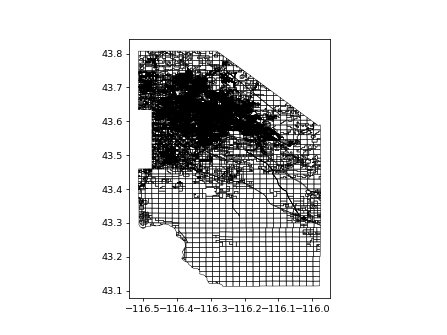

In [7]:
import matplotlib.pyplot as plt
import geopandas
%matplotlib notebook

fig, ax = plt.subplots(1, 1)

df_3.geometry.boundary.plot(color=None, edgecolor='k', linewidth=0.5, ax=ax)



plt.show()

In [6]:
df_3.to_file('parcel-risk.shp')